In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout



C:\Users\barry\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
file_path = 'content/selected_columns_s.txt'

with open(file_path, 'r') as file:
    selected_columns = [line.strip() for line in file]

print(selected_columns)

['gameid', 'playerid', 'plusminusPTS', 'estNETRTG', 'REBpct', 'estOFFRTG', 'DRB', 'FTM', 'uncontestedFGM', 'passes', 'ASTpct', 'touches', 'estUSGpct', 'oppPIP', 'TRB', 'oppFBPTS', 'PTS', 'estpace', 'FGpct', 'pie', 'DIST', 'defendedatrimFGA', 'BLK', '2ndPTS', 'TOVratio', 'pace', 'paceper40', '2ndAST', 'contestedFGA', 'OFFRTG', 'TSpct', 'FGM', '3Ppct', 'FTAST', 'STL', 'defendedatrimFGM', 'SEC', 'defendedatrimFGpct', 'oppPTSoffTOV', 'FBPTS', 'contestedFGM', '3PM', 'name', 'PIP', 'SPD', 'FTpct', 'PTSoffTOV', 'DEFRTG', 'team', 'home', 'win']


In [ ]:
# df = pd.read_csv('content/final_player_lstm.csv')

In [4]:
df[selected_columns]

,gameid,playerid,plusminusPTS,estNETRTG,REBpct,estOFFRTG,DRB,FTM,uncontestedFGM,passes,...,3PM,name,PIP,SPD,FTpct,PTSoffTOV,DEFRTG,team,home,win
0,22200001.0,201143.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,3,3,1.0
1,22200001.0,203935.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,364.0,0.0,0.0,0.0,0.0,0.0,3,3,1.0
2,22200001.0,203943.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,410.0,0.0,0.0,0.0,0.0,0.0,3,3,1.0
3,22200001.0,1627759.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,242.0,0.0,0.0,0.0,0.0,0.0,3,3,1.0
4,22200001.0,1627763.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,357.0,0.0,0.0,0.0,0.0,0.0,3,3,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39595,42200405.0,1629639.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,518.0,0.0,0.0,0.0,0.0,0.0,16,8,1.0
39596,42200405.0,1630209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,416.0,0.0,0.0,0.0,0.0,0.0,16,8,1.0
39597,42200405.0,1631107.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,408.0,0.0,0.0,0.0,0.0,0.0,16,8,1.0
39598,42200405.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0


In [5]:
df[selected_columns].to_csv('content/Looki.csv', index=False)

In [6]:
data = df[selected_columns]

In [7]:
import pandas as pd


# 確認每個比賽有 30 行數據
num_rows_per_game = 30

# 初始化空列表來存放合併後的資料
merged_data = []

# 用range來遍歷資料集，每次處理30行
for i in range(0, len(data), num_rows_per_game):
    # 取出當前30行
    block = data.iloc[i:i+num_rows_per_game]

    # 取出第一行的gameid, home, win
    gameid = block['gameid'].iloc[0]
    win = block['win'].iloc[0]

    # 前15行為team, 後15行為opp_team
    team = block['team'].iloc[:15].unique()[0]  # 取出前15行的team (假設都是同一隊)
    opp_team = block['team'].iloc[15:].unique()[0]  # 取出後15行的team作為opp_team

    # 把gameid放在合併的第一個欄位
    row_data = [gameid]

    # 將30行展平成一行，跳過 gameid、team、home、win 這些欄位
    for _, row in block.iterrows():
        row_data.extend(row.drop(['gameid', 'team', 'win']))

    # 在最後添加 team, opp_team, home, win
    row_data.extend([team, opp_team, win])

    # 將展平的一行加入到結果列表
    merged_data.append(row_data)

# 創建合併後的DataFrame
merged_df = pd.DataFrame(merged_data)

# 為新DataFrame設置適當的欄位名稱
column_names = ['gameid']
for player_num in range(1, num_rows_per_game + 1):
    for col in data.columns:
        if col not in ['gameid', 'team', 'win']:  # 跳過這些欄位的名稱
            column_names.append(f'{col}_player_{player_num}')

# 添加 team, opp_team, home, win 的欄位名
column_names.extend(['team', 'opp_team', 'win'])

# 設定新的欄位名稱
merged_df.columns = column_names

# 保存合併後的資料為CSV
merged_df.to_csv('merged_roll_drop_flat.csv', index=False)

In [8]:
merged_df

,gameid,playerid_player_1,plusminusPTS_player_1,estNETRTG_player_1,REBpct_player_1,estOFFRTG_player_1,DRB_player_1,FTM_player_1,uncontestedFGM_player_1,passes_player_1,...,name_player_30,PIP_player_30,SPD_player_30,FTpct_player_30,PTSoffTOV_player_30,DEFRTG_player_30,home_player_30,team,opp_team,win
0,22200001.0,201143.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,23,1.0
1,22200002.0,203952.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,14,1.0
2,22200003.0,1628977.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,22,1.0
3,22200004.0,204456.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,264.0,0.0,0.0,0.0,0.0,0.0,12.0,12,30,0.0
4,22200005.0,203991.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,11,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,42200401.0,201145.0,-2.577159,-9.862514,0.059742,108.915320,1.743556,1.156588,1.115969,13.537220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,16,1.0
1316,42200402.0,201145.0,-3.110973,-12.010722,0.058330,107.518010,1.626590,1.124995,1.005290,13.093028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,16,0.0
1317,42200403.0,2617.0,-3.800000,-32.180000,0.124600,98.960000,1.200000,0.600000,1.400000,11.400000,...,195.0,0.0,0.0,0.0,0.0,0.0,16.0,16,8,0.0
1318,42200404.0,201567.0,-1.657278,-5.507769,0.161145,105.364110,4.285362,0.758092,1.799709,23.611270,...,435.0,0.0,0.0,0.0,0.0,0.0,16.0,16,8,0.0


In [9]:
shape = 1444

In [10]:
merged_df = merged_df.drop(index=merged_df.index[:80])

In [11]:
merged_df

,gameid,playerid_player_1,plusminusPTS_player_1,estNETRTG_player_1,REBpct_player_1,estOFFRTG_player_1,DRB_player_1,FTM_player_1,uncontestedFGM_player_1,passes_player_1,...,name_player_30,PIP_player_30,SPD_player_30,FTpct_player_30,PTSoffTOV_player_30,DEFRTG_player_30,home_player_30,team,opp_team,win
80,22200081.0,1626158.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26,16,1.0
81,22200082.0,1626162.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,10,1.0
82,22200083.0,201142.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,12,0.0
83,22200084.0,203897.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,23,0.0
84,22200085.0,203507.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,42200401.0,201145.0,-2.577159,-9.862514,0.059742,108.915320,1.743556,1.156588,1.115969,13.537220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,16,1.0
1316,42200402.0,201145.0,-3.110973,-12.010722,0.058330,107.518010,1.626590,1.124995,1.005290,13.093028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,16,0.0
1317,42200403.0,2617.0,-3.800000,-32.180000,0.124600,98.960000,1.200000,0.600000,1.400000,11.400000,...,195.0,0.0,0.0,0.0,0.0,0.0,16.0,16,8,0.0
1318,42200404.0,201567.0,-1.657278,-5.507769,0.161145,105.364110,4.285362,0.758092,1.799709,23.611270,...,435.0,0.0,0.0,0.0,0.0,0.0,16.0,16,8,0.0


In [12]:
# 將每場比賽中的所有球員數據合併成一個特徵向量
X = []
y = []

In [13]:
# 假設 merged_df 已定義且包含 win 欄位
y = np.array(merged_df['win'])            # 將 win 欄位轉換為 NumPy 陣列

# 檢查是否包含字串 'TRUE' 或 'FALSE'，若是則轉換，否則直接使用
if y.dtype.type is np.str_:
    y = np.where(y == 'TRUE', 1, 0)       # 將 'TRUE' 轉換為 1，'FALSE' 轉換為 0

# 選擇性地進行 one-hot 編碼
y = to_categorical(y, 2)          # 轉換為 one-hot 編碼格式（若模型需要）


In [14]:
X = np.array(merged_df.drop(columns=['win']))
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442
0,22200081.0,1626158.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,16.0
1,22200082.0,1626162.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,10.0
2,22200083.0,201142.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0
3,22200084.0,203897.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,23.0
4,22200085.0,203507.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,42200401.0,201145.0,-2.577159,-9.862514,0.059742,108.915320,1.743556,1.156588,1.115969,13.537220,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,16.0
1236,42200402.0,201145.0,-3.110973,-12.010722,0.058330,107.518010,1.626590,1.124995,1.005290,13.093028,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,16.0
1237,42200403.0,2617.0,-3.800000,-32.180000,0.124600,98.960000,1.200000,0.600000,1.400000,11.400000,...,0.0,195.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,8.0
1238,42200404.0,201567.0,-1.657278,-5.507769,0.161145,105.364110,4.285362,0.758092,1.799709,23.611270,...,0.0,435.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,8.0


In [15]:
Y = pd.DataFrame(y)

In [16]:
Y

,0,1
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
1235,0.0,1.0
1236,1.0,0.0
1237,1.0,0.0
1238,1.0,0.0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle = False)
X_train_df = pd.DataFrame(X_train)
# X_train_df.to_csv('content/X_trainA.csv', index=False)

In [ ]:
# # 將每個拆分的數據儲存為 CSV 檔案
# X_train.to_csv('content/train_test/X_train.csv', index=False)  # 儲存 X 訓練數據
# X_test.to_csv('content/train_test/X_test.csv', index=False)    # 儲存 X 測試數據
# y_train.to_csv('content/train_test/y_train.csv', index=False)  # 儲存 y 訓練數據
# y_test.to_csv('content/train_test/y_test.csv', index=False)    # 儲存 y 測試數據

In [76]:
# import pandas as pd

# # 讀取檔案
X_train = pd.read_csv('content/train_test/X_train.csv')
X_train_s = pd.read_csv('content/train_test/X_train_s.csv')
X_test = pd.read_csv('content/train_test/X_test.csv')
X_test_s = pd.read_csv('content/train_test/X_test_s.csv')
y_train = pd.read_csv('content/train_test/y_train.csv')
y_train_s = pd.read_csv('content/train_test/y_train_s.csv')
y_test = pd.read_csv('content/train_test/y_test.csv')
y_test_s = pd.read_csv('content/train_test/y_test_s.csv')

# 將有 `_s` 後綴的檔案合併到對應的無 `_s` 後綴檔案下方
X_train_combined = pd.concat([X_train, X_train_s], ignore_index=True)
X_test_combined = pd.concat([X_test, X_test_s], ignore_index=True)
y_train_combined = pd.concat([y_train, y_train_s], ignore_index=True)
y_test_combined = pd.concat([y_test, y_test_s], ignore_index=True)

# 儲存合併後的檔案
X_train_combined.to_csv('content/train_test/X_train_combined.csv', index=False)
X_test_combined.to_csv('content/train_test/X_test_combined.csv', index=False)
y_train_combined.to_csv('content/train_test/y_train_combined.csv', index=False)
y_test_combined.to_csv('content/train_test/y_test_combined.csv', index=False)


In [77]:
X_train = X_train_combined
X_test = X_test_combined
y_train = y_train_combined
y_test = y_test_combined

In [78]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442
0,22200081.0,1626158.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,16.0
1,22200082.0,1626162.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,10.0
2,22200083.0,201142.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0
3,22200084.0,203897.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,23.0
4,22200085.0,203507.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,22200212.0,1628964.0,1.33217,-5.332292,0.165279,27.754778,3.127673,1.052182,1.387075,22.730946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,18.0
1732,22200273.0,203914.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,23.0
1733,22200297.0,203914.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,23.0
1734,22200313.0,203914.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,1.0


In [79]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,1433,1434,1435,1436,1437,1438,1439,1440,1441,1442
0,22200950.0,203897.0,1.975401,3.616376,0.061984,112.634910,3.742555,5.210785,5.389807,35.455630,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,5.0,24.0
1,22200951.0,1630215.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,21.0,29.0
2,22200952.0,201145.0,-4.408230,-12.017663,0.053167,105.804120,1.623833,1.291522,1.830288,15.615140,...,0.344784,309.0,5.616276,3.238877,0.14439,0.941278,82.65813,8.0,8.0,15.0
3,22200953.0,1626172.0,4.897590,9.505113,0.200998,117.119156,6.595468,0.970302,0.870116,34.740715,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,10.0,19.0
4,22200954.0,1626168.0,0.905119,1.960353,0.125309,114.613266,3.170711,1.712799,1.567101,21.895405,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,26.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,22201130.0,1641645.0,6.000000,82.533333,0.151000,137.533333,0.666667,0.000000,0.000000,3.333333,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,30.0,3.0
740,22201151.0,1641645.0,5.000000,58.850000,0.113250,132.325000,0.500000,0.000000,0.000000,3.000000,...,0.000000,241.0,0.000000,0.000000,0.00000,0.000000,0.00000,30.0,30.0,22.0
741,22201179.0,1630643.0,5.000000,57.675000,0.089250,140.950000,1.000000,1.250000,0.000000,3.750000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,30.0,17.0
742,22201204.0,1630643.0,2.800000,58.480000,0.119600,149.660000,2.600000,2.200000,1.200000,13.000000,...,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.0,30.0,16.0


In [80]:
y_train

,0,1
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
1731,1.0,0.0
1732,1.0,0.0
1733,1.0,0.0
1734,1.0,0.0


In [81]:
y_test

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
739,0.0,1.0
740,1.0,0.0
741,1.0,0.0
742,0.0,1.0


In [82]:
from sklearn.preprocessing import MinMaxScaler
# 標準化
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [83]:
print(X_test.shape)
print(X_test.shape)
print(X_test)

(744, 1443)
(744, 1443)
[[3.16331119e-05 1.23582998e-01 4.26342354e-01 ... 0.00000000e+00
  1.37931034e-01 7.93103448e-01]
 [3.16664450e-05 9.99321546e-01 3.69751751e-01 ... 0.00000000e+00
  6.89655172e-01 9.65517241e-01]
 [3.16997781e-05 1.21893310e-01 2.43466331e-01 ... 2.66666667e-01
  2.41379310e-01 4.82758621e-01]
 ...
 [3.92663918e-05 9.99584332e-01 5.12989989e-01 ... 0.00000000e+00
  1.00000000e+00 5.51724138e-01]
 [4.00997193e-05 9.99584332e-01 4.49965164e-01 ... 0.00000000e+00
  1.00000000e+00 5.17241379e-01]
 [4.06997151e-05 9.99327686e-01 3.64022221e-01 ... 1.00000000e+00
  1.00000000e+00 3.44827586e-01]]


In [84]:
print(X_train.shape)
print(X_train)

(1736, 1443)
[[2.66664800e-06 9.96830607e-01 3.69751751e-01 ... 0.00000000e+00
  8.62068966e-01 5.17241379e-01]
 [2.69998110e-06 9.96833063e-01 3.69751751e-01 ... 0.00000000e+00
  1.03448276e-01 3.10344828e-01]
 [2.73331420e-06 1.21891468e-01 3.69751751e-01 ... 0.00000000e+00
  3.44827586e-02 3.79310345e-01]
 ...
 [9.86659760e-06 1.23593436e-01 3.69751751e-01 ... 0.00000000e+00
  7.24137931e-01 7.58620690e-01]
 [1.03999272e-05 1.23593436e-01 3.69751751e-01 ... 0.00000000e+00
  7.24137931e-01 0.00000000e+00]
 [1.17332512e-05 9.98185673e-01 3.69751751e-01 ... 0.00000000e+00
  7.24137931e-01 5.51724138e-01]]


In [85]:
print(y_train.shape)
print(y_train)

(1736, 2)
        0    1
0     0.0  1.0
1     0.0  1.0
2     1.0  0.0
3     1.0  0.0
4     0.0  1.0
...   ...  ...
1731  1.0  0.0
1732  1.0  0.0
1733  1.0  0.0
1734  1.0  0.0
1735  1.0  0.0

[1736 rows x 2 columns]


In [86]:
X_shape = shape-1

In [87]:
X_shape

1443

In [88]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

dropout_rate = 0.2

# Reshape the input data correctly
X_train = X_train.reshape(X_train.shape[0], 1, X_shape)  # (samples, time steps, features)
X_test = X_test.reshape(X_test.shape[0], 1, X_shape)    # (samples, time steps, features)

my_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(80, activation=tf.nn.tanh, return_sequences=True, input_shape=(1, X_shape)), # Correct input shape
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.LSTM(60, activation=tf.nn.tanh, return_sequences=True),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.LSTM(40, activation=tf.nn.tanh),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(20, activation=tf.nn.sigmoid),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

my_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型
my_model.fit(X_train, y_train, epochs=30, batch_size=32)

# 评估模型
loss, accuracy = my_model.evaluate(X_test, y_test, verbose=0)

print(f"模型准确性: {accuracy:.2f}")

Epoch 1/30
55/55 [==============================] - 6s 8ms/step - loss: 0.7505 - accuracy: 0.5276
Epoch 2/30
55/55 [==============================] - 0s 8ms/step - loss: 0.6914 - accuracy: 0.5616
Epoch 3/30
55/55 [==============================] - 0s 6ms/step - loss: 0.6924 - accuracy: 0.5709
Epoch 4/30
55/55 [==============================] - 0s 5ms/step - loss: 0.6856 - accuracy: 0.5789
Epoch 5/30
55/55 [==============================] - 0s 6ms/step - loss: 0.6799 - accuracy: 0.5933
Epoch 6/30
55/55 [==============================] - 0s 5ms/step - loss: 0.6720 - accuracy: 0.5691
Epoch 7/30
55/55 [==============================] - 1s 10ms/step - loss: 0.6713 - accuracy: 0.5950
Epoch 8/30
55/55 [==============================] - 0s 5ms/step - loss: 0.6409 - accuracy: 0.6238
Epoch 9/30
55/55 [==============================] - 0s 5ms/step - loss: 0.6327 - accuracy: 0.6423
Epoch 10/30
55/55 [==============================] - 0s 7ms/step - loss: 0.6189 - accuracy: 0.6573
Epoch 11/30
55/55 

In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss, accuracy_score, confusion_matrix
from sklearn.base import clone, BaseEstimator, ClassifierMixin # Import BaseEstimator and ClassifierMixin
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# ... (Your existing code for model creation and training) ...

# Update KerasClassifier to inherit from BaseEstimator and ClassifierMixin and implement clone method
class KerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model
        self.classes_ = [0, 1]  # Add this line to define classes_

    def predict_proba(self, X):
        # Ensure X has the correct shape for the LSTM model
        X = X.reshape(X.shape[0], 1, X_shape)

        # Get raw predictions
        y_pred = self.model.predict(X)

        # Assuming binary classification, return probabilities
        return y_pred

    def predict(self, X):
        # Get probabilities
        probs = self.predict_proba(X)

        # Return the class with the highest probability
        return np.argmax(probs, axis=1)

    def fit(self, X, y):
        # This is a dummy fit method. The model is assumed to be already trained.
        # If you need to re-train, implement the logic here.
        # Manually set classes_ during fit
        self.classes_ = np.unique(y)  # Add this line
        pass

    def get_params(self, deep=True):
        # Return a dictionary of the model's parameters
        # (This may need to be adjusted depending on your specific TensorFlow model)
        return {}

    def set_params(self, **parameters):
        # Update the model's parameters
        # (This may need to be adjusted depending on your specific TensorFlow model)
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    # Implement the clone method for KerasClassifier
    def __sklearn_clone__(self, make_deep=False):
        """
        Since `clone` doesn't know how to handle custom classes like `KerasClassifier`,
        we implement a custom `__sklearn_clone__` method to handle the cloning process.

        This method creates a new instance of `KerasClassifier` with the same model.
        """
        new_classifier = type(self)(self.model) # Pass the model during instantiation
        return new_classifier

# ... (Your existing code for model creation and training) ...

# Now you can use the wrapper in CalibratedClassifierCV
keras_clf = KerasClassifier(my_model)

# Convert y_train to 1D for CalibratedClassifierCV
y_train_1d = np.argmax(y_train.values, axis=1)  # Assuming y_train is a DataFrame

calibrated_model = CalibratedClassifierCV(keras_clf, method='sigmoid', cv=5)
calibrated_model.fit(X_train, y_train_1d)  # Use the 1D target array


11/11 [==============================] - 0s 5ms/step


CalibratedClassifierCV(cv=5, estimator=KerasClassifier())

In [90]:
# Now you can use the wrapper in CalibratedClassifierCV
keras_clf = KerasClassifier(my_model)

# Convert y_train to 1D for CalibratedClassifierCV
y_train_1d = np.argmax(y_train.values, axis=1)  # Assuming y_train is a DataFrame

calibrated_model = CalibratedClassifierCV(keras_clf, method='sigmoid', cv=5)
calibrated_model.fit(X_train, y_train_1d)  # Use the 1D target array



# ... (Rest of your code) ...

# 獲取校準後的預測概率
y_prob_calibrated = calibrated_model.predict_proba(X_test)[:, 1]

# 進行預測並評估模型
y_pred_calibrated = calibrated_model.predict(X_test)

# Convert y_test to binary format if it's in multilabel-indicator format
# Assuming y_test is a DataFrame or a 2D NumPy array
y_test_binary = np.argmax(y_test.values, axis=1)
cm = confusion_matrix(y_test_binary, y_pred_calibrated)
# Now calculate accuracy with consistent formats
accuracy = accuracy_score(y_test_binary, y_pred_calibrated)
brier_score = brier_score_loss(y_test_binary, y_prob_calibrated) # y_prob_calibrated is expected to be for the positive class


print(f"校準後的準確率: {accuracy}")
print(f"Brier 損失分數: {brier_score}")



24/24 [==============================] - 0s 2ms/step
校準後的準確率: 0.728494623655914
Brier 損失分數: 0.20623658858338662


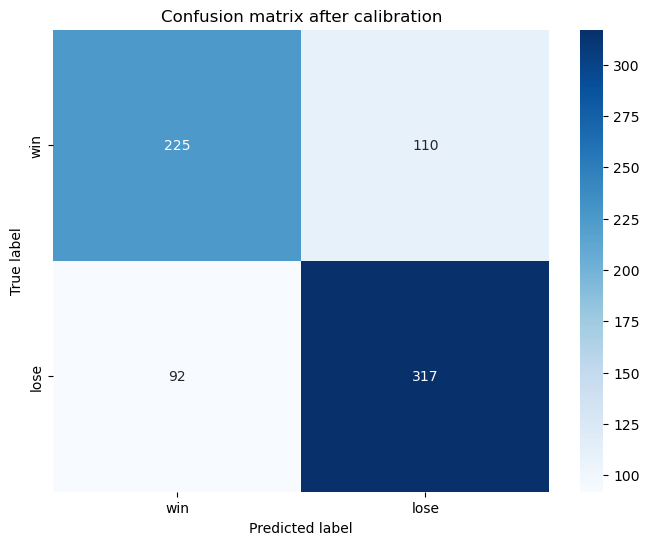

In [91]:
# 生成混淆矩陣

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["win", "lose"], yticklabels=["win", "lose"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion matrix after calibration")
plt.show()



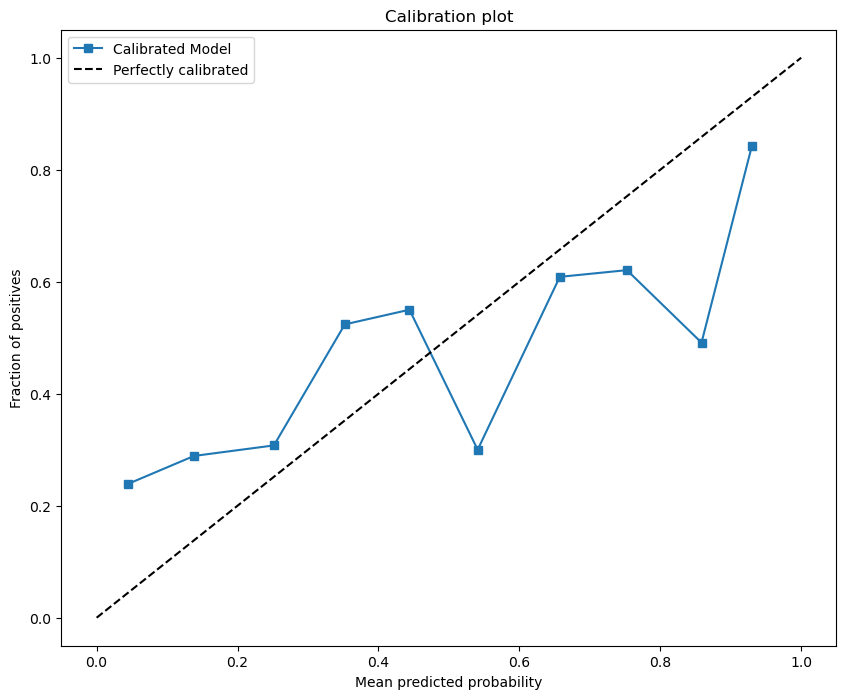

In [92]:
# 畫出校準曲線
from sklearn.calibration import calibration_curve

plt.figure(figsize=(10, 8))
# ... (Rest of your code) ...

# Convert y_test to 1D for calibration_curve using argmax
y_test_1d = np.argmax(y_test.values, axis=1)  # Assuming y_test is a DataFrame or a 2D NumPy array

# Calculate calibration curve using the 1D version of y_test
fraction_of_positives, mean_predicted_value = calibration_curve(y_test_1d, y_prob_calibrated, n_bins=10)

# ... (Rest of your code) ...

plt.plot(mean_predicted_value, fraction_of_positives, "s-", label="Calibrated Model")
plt.plot([0, 1], [0, 1], "k--", label="Perfectly calibrated")
plt.xlabel("Mean predicted probability")
plt.ylabel("Fraction of positives")
plt.legend()
plt.title("Calibration plot")
plt.show()

In [93]:
# 保存模型到指定的文件路徑
my_model.save('my_model_3.h5')

# 保存模型架構到 JSON 格式
model_json = my_model.to_json()
with open('my_model_3.json', 'w') as json_file:
    json_file.write(model_json)

In [94]:
my_model.save('my_model_3.keras')

In [95]:
# 函數：處理球隊 ID 並將結果存入 result_array
def process_player_ids(player_ids, data, selected_columns):
    for player_id in player_ids:
        found = False
        for idx in range(len(data) - 1, -1, -1):  # 從最後一行開始
            if data.loc[idx, 'playerid'] == player_id:  # 找到對應的 player_id
                # 提取該行的特徵數據
                selected_data = data.loc[idx, selected_columns]
                # 存到結果陣列中
                result_array.append(selected_data)
                found = True
                break  # 找到後跳出內部循環，進行下一個 player_id 的處理

        if not found:
            # 如果沒有找到該 player_id，填充一行全為 0 的數據
            zero_data = pd.Series([0] * len(selected_columns), index=selected_columns)
            result_array.append(zero_data)

In [96]:
import pandas as pd
import numpy as np

# 創建一個存儲結果的新陣列
result_array = []
# 增加球員ID到15位
team1_player_ids = [202699, 200782, 203954, 1630178, 201935, 203507, 201566, 1629630, 202694, 1628389, 1628419, 1630162, 1628378, 201152, 201571]
team2_player_ids = [1627759, 1629626, 201143, 1628401, 203935, 203518, 1626153, 1629602, 1629006, 201959, 1630242, 1627749, 1629019, 1626164, 202699]



# 處理 team1_player_ids
process_player_ids(team1_player_ids, data, selected_columns)

# 處理 team2_player_ids
process_player_ids(team2_player_ids, data, selected_columns)

# 將結果轉換為 DataFrame 方便查看
result_df = pd.DataFrame(result_array)



In [97]:
result_df

,gameid,playerid,plusminusPTS,estNETRTG,REBpct,estOFFRTG,DRB,FTM,uncontestedFGM,passes,...,3PM,name,PIP,SPD,FTpct,PTSoffTOV,DEFRTG,team,home,win
39115,42200217.0,202699.0,2.081144,3.612868,0.098972,111.041030,5.206747,1.199733,3.097441,32.072056,...,1.458789,500.0,7.440309,4.024386,0.578036,2.511436,111.894110,23.0,3.0,1.0
29154,22200972.0,200782.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,422.0,0.000000,0.000000,0.000000,0.000000,0.000000,23.0,12.0,0.0
39105,42200217.0,203954.0,3.517441,3.301172,0.154787,109.424680,8.441963,8.305027,5.482346,41.962505,...,0.735078,259.0,11.935014,3.566026,0.803180,3.966946,108.479720,23.0,3.0,1.0
39112,42200217.0,1630178.0,1.254265,-0.437909,0.054581,112.027910,4.222897,2.961216,5.483699,47.220898,...,3.337129,521.0,7.557175,4.240412,0.613745,3.923919,111.472620,23.0,3.0,1.0
39111,42200217.0,201935.0,-2.049608,-0.199387,0.088779,109.997230,5.470558,5.545974,3.879717,64.551610,...,2.316419,227.0,5.592968,3.473761,0.900316,2.230591,111.917130,23.0,3.0,1.0
38130,42200105.0,203507.0,4.264374,3.331956,0.180617,118.222970,8.385406,5.357717,4.069776,38.974125,...,0.732098,172.0,18.777655,3.979105,0.594463,4.115242,116.604150,17.0,17.0,0.0
38117,42200175.0,201566.0,-0.677510,-6.746001,0.096894,113.021980,4.398051,2.810607,4.012333,47.734950,...,1.669387,457.0,10.808959,3.861664,0.496803,3.049212,118.933784,13.0,24.0,1.0
38298,42200156.0,1629630.0,3.784980,8.067788,0.091968,115.619095,5.041289,4.749179,4.718950,46.131470,...,2.135136,200.0,13.399061,4.054858,0.669488,5.430240,107.655266,15.0,14.0,1.0
38122,42200175.0,202694.0,-4.054107,-8.076924,0.066427,95.951240,2.828839,0.824990,1.524136,21.782354,...,0.996811,363.0,2.174830,3.972392,0.310218,1.145442,116.670610,13.0,24.0,1.0
39586,42200405.0,1628389.0,-0.308072,-0.248557,0.146723,110.115390,7.614990,3.884098,3.944146,48.189926,...,0.018731,30.0,12.586626,3.906568,0.741145,3.628168,111.526375,16.0,8.0,1.0


In [98]:
feature_vector = result_df.values.flatten()

feature_vector = np.append(feature_vector,776)
# 將一維向量轉換為 DataFrame 的一行
flattened_df = pd.DataFrame([feature_vector])

In [99]:
flattened_df

,0,1,2,3,4,5,6,7,8,9,...,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530
0,42200217.0,202699.0,2.081144,3.612868,0.098972,111.04103,5.206747,1.199733,3.097441,32.072056,...,500.0,7.440309,4.024386,0.578036,2.511436,111.89411,23.0,3.0,1.0,776.0


In [100]:
flattened_df = scaler.fit_transform(flattened_df)

In [101]:
input_vector = flattened_df.reshape(1, 1, 1501)
predicted_class = my_model.predict(input_vector)

# 打印預測的類別
print("Predicted class:", predicted_class)

ValueError: cannot reshape array of size 1531 into shape (1,1,1501)

In [ ]:
# 創建一個存儲結果的新陣列
result_array = []
# 增加球員ID到15位
team1_player_ids = [1627759, 1629626, 201143, 1628401, 203935, 203518, 1626153, 1629602, 1629006, 201959, 1630242, 1627749, 1629019, 1626164, 202699]
team2_player_ids = [202699, 200782, 203954, 1630178, 201935, 203507, 201566, 1629630, 202694, 1628389, 1628419, 1630162, 1628378, 201152, 201571]

# 處理 team1_player_ids
process_player_ids(team1_player_ids, data, selected_columns)

# 處理 team2_player_ids
process_player_ids(team2_player_ids, data, selected_columns)


In [ ]:
result_df = pd.DataFrame(result_array)
result_df

In [ ]:
feature_vector = result_df.values.flatten()
feature_vector = np.append(feature_vector,776)
# 將一維向量轉換為 DataFrame 的一行
flattened_df = pd.DataFrame([feature_vector])
flattened_df


In [ ]:
#標準化
flattened_df = scaler.fit_transform(flattened_df)
input_vector = flattened_df.reshape(1, 1, 1501)
predicted_class = my_model.predict(input_vector)

# 打印預測的類別
print("Predicted class:", predicted_class)

data

In [ ]:
games_data = games

In [ ]:
games_data

In [ ]:
final_data = pd.read_csv('/content/final_data.csv')
final_data

In [ ]:
import pandas as pd

# 讀取資料
final_data = pd.read_csv('/content/final_data.csv')
games_data = pd.read_csv('content/games.csv')

# 使用 merge 操作，基於 'gameid' 進行合併
merged_data = final_data.merge(games_data[['gameid', 'date']], on='gameid', how='left', suffixes=('', '_games'))

# 條件替換：當 playerid 不為 0 時，替換 final_data 中的 date
condition = final_data['playerid'] != 0
final_data.loc[condition, 'date'] = merged_data.loc[condition, 'date_games']

# 查看結果，確保數據被正確替換
print(final_data.head())

# 保存最終結果
final_data.to_csv('content/final_data_updated.csv', index=False)


In [ ]:
final_data.date

In [ ]:
import pandas as pd

# 假設 date 列已經存在於 final_data 中
# final_data = pd.read_csv('content/final_data.csv')

# 使用 pd.to_datetime 轉換日期格式，並提取日期部分
final_data['date'] = pd.to_datetime(final_data['date'], errors='coerce').dt.date

# 查看轉換結果
print(final_data['date'].head())

# 保存結果
final_data.to_csv('content/final_data_updated.csv', index=False)


In [ ]:
# 函數：處理球隊 ID 並將結果存入 result_array
def process_player_ids2(player_ids, data, selected_columns, date, result_array):
    # result_array = []  # 用來存放結果
    date = pd.to_datetime(date)  # 將輸入的日期轉換為 datetime 格式

    for player_id in player_ids:
        found_data = []  # 用來存放找到的符合條件的行
        found_count = 0  # 計算找到的符合條件的行數

        for idx in range(len(data) - 1, -1, -1):  # 從最後一行開始倒序遍歷
            # 找到符合條件的 player_id 且日期在所選日期之前
            if data.loc[idx, 'playerid'] == player_id and pd.to_datetime(data.loc[idx, 'date']) <= date:
                # 提取該行的特徵數據
                selected_data = data.loc[idx, selected_columns]
                # 將符合條件的數據添加到 found_data 列表中
                found_data.append(selected_data)
                found_count += 1

                # 如果已經找到了 5 行數據，則跳出循環
                if found_count == 5:
                    break

        # 如果找到的符合條件的行少於 5 行，則用 0 填充其餘的行
        while len(found_data) < 5:
            zero_data = pd.Series([0] * len(selected_columns), index=selected_columns)
            found_data.append(zero_data)

        # 將找到的數據存入結果陣列
        result_array.extend(found_data)

    return result_array

In [ ]:
import pandas as pd
import numpy as np

# 創建一個存儲結果的新陣列
result_arr1 = []
result_arr2 = []
# 增加球員ID到15位
team1_player_ids = [202699, 200782, 203954, 1630178, 201935, 203507, 201566, 1629630, 202694, 1628389, 1628419, 1630162, 1628378, 201152, 201571]
team2_player_ids = [1627759, 1629626, 201143, 1628401, 203935, 203518, 1626153, 1629602, 1629006, 201959, 1630242, 1627749, 1629019, 1626164, 202699]
date = '2023-06-20'


# 處理 team1_player_ids
process_player_ids2(team1_player_ids, final_data, selected_columns, date, result_arr1)

# 處理 team2_player_ids
process_player_ids2(team2_player_ids, final_data, selected_columns, date, result_arr2)

# 將結果轉換為 DataFrame 方便查看
result_df2 = pd.DataFrame(result_array2)



In [ ]:
result_df.shape

In [ ]:
result_df